In [8]:
import pandas as pd
df = pd.read_csv('newData.txt', sep = '\s+', engine = 'python', skiprows = 15)
df = df.T
#print(df)
#print("swap:")
for i in range(0,df.shape[1], 1):
    if(pd.isna(df.at[df.index[4], i])):
        df[i] = df[i].shift(periods=2, freq=None, axis=0)
        
df=df.T
for i in range(1,df.shape[0], 1):
    if(pd.isna(df.at[df.index[i], 'TrgID'])):
        df.at[df.index[i], 'TrgID'] = df.at[df.index[i-1], 'TrgID']
#print(df.at[df.index[2], 'TrgID'])
#Outdated method
l0x = [[0] * 28, [0]*28, [0]*28]
l1x = [[0] * 28, [0]*28, [0]*28]
l2x = [[0] * 28, [0]*28, [0]*28]
l3x = [[0] * 28, [0]*28, [0]*28]

i = 0
while(df.at[df.index[i], 'TrgID'] == 0):
    l0x[int((df.at[df.index[i], 'Brd'])/2)][int(df.at[df.index[i], 'Ch'])] = df.at[df.index[i], 'LG']
    i+=1
while(df.at[df.index[i], 'TrgID'] == 1):
    l1x[int((df.at[df.index[i], 'Brd'])/2)][int(df.at[df.index[i], 'Ch'])] = df.at[df.index[i], 'LG']
    i+=1
while(df.at[df.index[i], 'TrgID'] == 2):
    l2x[int((df.at[df.index[i], 'Brd'])/2)][int(df.at[df.index[i], 'Ch'])] = df.at[df.index[i], 'LG']
    i+=1
while(i< df.shape[0] and df.at[df.index[i], 'TrgID'] == 3):
    l3x[int((df.at[df.index[i], 'Brd'])/2)][int(df.at[df.index[i], 'Ch'])] = df.at[df.index[i], 'LG']
    i+=1

print("Event 0:")
print(l0x)
print("Event 1:")
print(l1x)
print("Event 2:")
print(l2x)
print("Event 3:")
print(l3x)

#New method    total[event][detector level: 0 = top][channel: 0 = rightmost triangle]
total = []
id = 0
i=0
while(id <= int(df.at[df.index[df.shape[0]-1], 'TrgID'])):
    print(df.at[df.index[df.shape[0]-1], 'TrgID'])
    
    total.append([[0] * 28, [0]*28, [0]*28])
    while(i< df.shape[0] and df.at[df.index[i], 'TrgID'] == id):
        print("Entry:")
        print(id)
        print(int((df.at[df.index[i], 'Brd'])/2))
        print(int(df.at[df.index[i], 'Ch']))
        print(df.at[df.index[i], 'LG'])
        total[id][int((df.at[df.index[i], 'Brd'])/2)][int(df.at[df.index[i], 'Ch'])] = df.at[df.index[i], 'LG']
        i+=1
    id +=1
    
print("3D array of awsomeness:")
print(total)

df




Event 0:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40.0, 400.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 250.0, 250.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Event 1:
[[240.0, 260.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50.0, 540.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200.0, 300.0, 0, 0]]
Event 2:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 600.0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70.0, 380.0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 350.0, 60.0, 0, 0, 0, 0, 0, 0, 35.0]]
Event 3:
[[0, 0, 0, 0, 0, 0, 0, 0, 200.0, 310.0, 0, 0, 0, 0, 380.0, 20.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

,Tstamp_us,TrgID,Brd,Ch,LG,HG
0,10000.555,0.0,0.0,14.0,500.0,39.0
1,NaN,0.0,0.0,15.0,25.0,41.0
2,10001.808,0.0,2.0,15.0,40.0,44.0
3,NaN,0.0,2.0,16.0,400.0,110.0
4,9965.050,0.0,4.0,16.0,250.0,36.0
5,NaN,0.0,4.0,17.0,250.0,34.0
6,15000.189,1.0,0.0,0.0,240.0,39.0
7,NaN,1.0,0.0,1.0,260.0,41.0
8,15054.077,1.0,2.0,12.0,50.0,44.0
9,NaN,1.0,2.0,13.0,540.0,110.0


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 25.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 

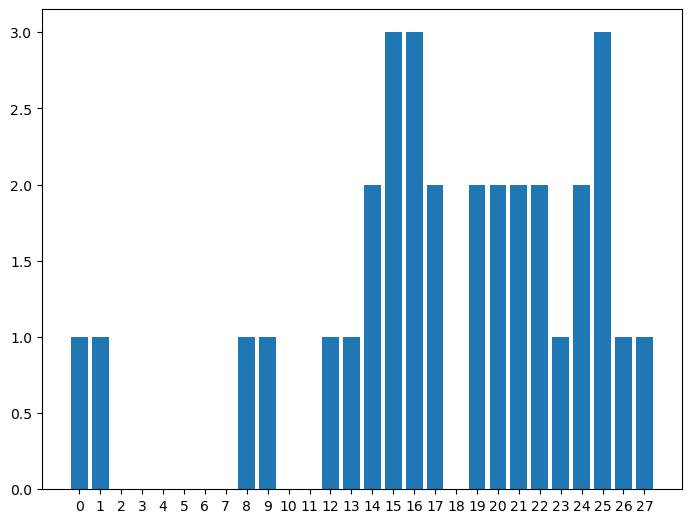

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = []
for i in range(28):
    langs.append(str(i))
print(langs)

channels = [0] * 28
for a in range(len(total)):
    for b in range(len(total[a])):
        for c in range(len(total[a][b])):
            print(total[a][b])
            if(total[a][b][c] > 0):
                channels[c] += 1;
ax.bar(langs,channels)
plt.show()

[40, 5]


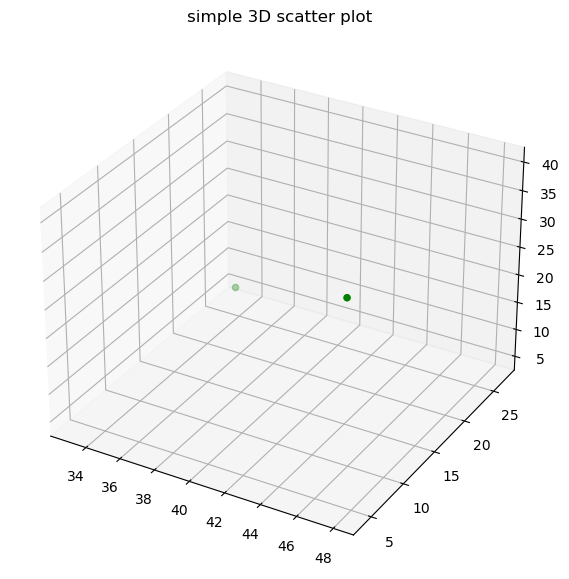

In [14]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = 
x = np.random.randint(80, size =(2))
y = np.random.randint(60, size =(2))

print(z)
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()